<a href="https://colab.research.google.com/github/Nikhil5566/Machine-Learning/blob/main/ML_Project_5_MINST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  MINST Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
!pip install kaggle

from google.colab import files

files.upload()  # Upload kaggle.json
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c digit-recognizer
!unzip digit-recognizer.zip

Saving kaggle.json to kaggle.json
  0% 0.00/15.3M [00:00<?, ?B/s]
100% 15.3M/15.3M [00:00<00:00, 996MB/s]
Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# Load and Inspect data

Training data shape: (60000, 28, 28), Labels: (60000,)
Test data shape: (10000, 28, 28), Labels: (10000,)


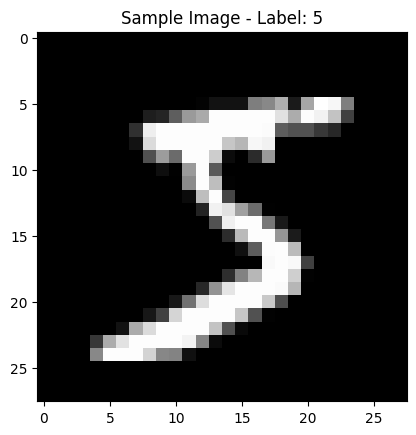

In [ ]:
# Loading MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Printing shapes to understand data
print(f"Training data shape: {X_train.shape}, Labels: {y_train.shape}")
print(f"Test data shape: {X_test.shape}, Labels: {y_test.shape}")

# Showing a sample image
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Sample Image - Label: {y_train[0]}")
plt.show()

In [ ]:
# Normalizing pixel values (0-255 to 0-1) and flatten images
X_train = X_train.reshape((X_train.shape[0], 28 * 28)).astype('float32') / 255.0
X_test = X_test.reshape((X_test.shape[0], 28 * 28)).astype('float32') / 255.0

# One-hot encode labels (e.g., 5 -> [0,0,0,0,0,1,0,0,0,0])
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Confirming preprocessing
print(f"Processed X_train shape: {X_train.shape}")
print(f"Processed y_train shape: {y_train.shape}")

Processed X_train shape: (60000, 784)
Processed y_train shape: (60000, 10)


# Build a simple feedforward neural network


In [ ]:
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compiling model with optimizer and loss
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Show model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

# Model Training


In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8639 - loss: 0.4676 - val_accuracy: 0.9567 - val_loss: 0.1460
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9640 - loss: 0.1208 - val_accuracy: 0.9678 - val_loss: 0.1113
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9749 - loss: 0.0801 - val_accuracy: 0.9710 - val_loss: 0.1038
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9825 - loss: 0.0556 - val_accuracy: 0.9724 - val_loss: 0.0950
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9867 - loss: 0.0417 - val_accuracy: 0.9715 - val_loss: 0.1010
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9888 - loss: 0.0350 - val_accuracy: 0.9729 - val_loss: 0.1025
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9933 - loss: 0.0237 - val_accuracy: 0.9734 - val_loss: 0.1092
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9929 - loss: 0.0235 

In [ ]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

Test Accuracy: 0.98


# Plot accuracy and loss curves


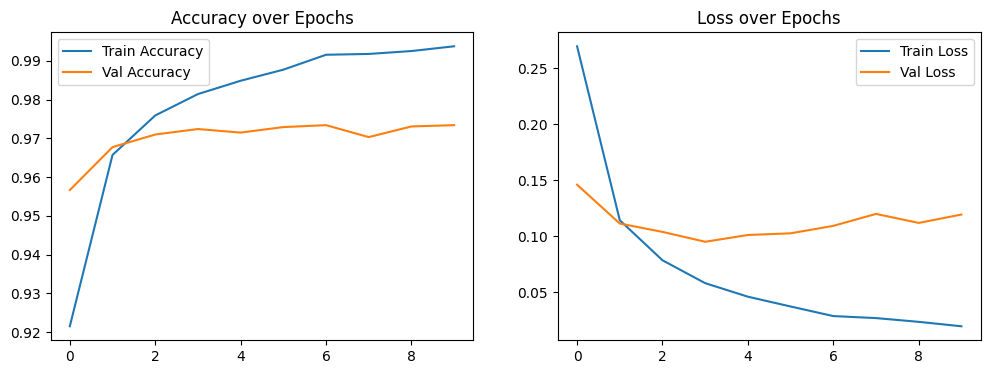

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()


# Show sample predictions


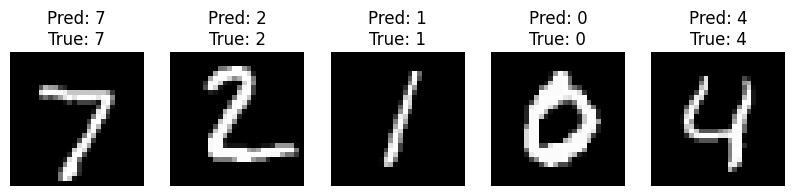

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {y_pred_classes[i]}\nTrue: {y_test_classes[i]}")
    plt.axis('off')
plt.show()

# Report making

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.99      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.99      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.99      0.95      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


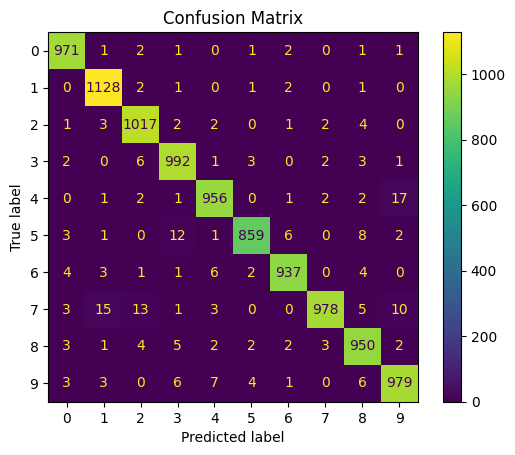

In [ ]:
# Predictions for confusion matrix and classification report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes))

# Confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_classes, y_pred_classes)
ConfusionMatrixDisplay(cm, display_labels=range(10)).plot()
plt.title('Confusion Matrix')
plt.show()

## Analyze misclassified samples

### Subtask:
Identify and visualize some examples of images that the model predicted incorrectly.


**Reasoning**:
Identify the misclassified images by comparing the predicted and true labels and then visualize a selection of these images with their predicted and true labels to understand where the model is making errors.



313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


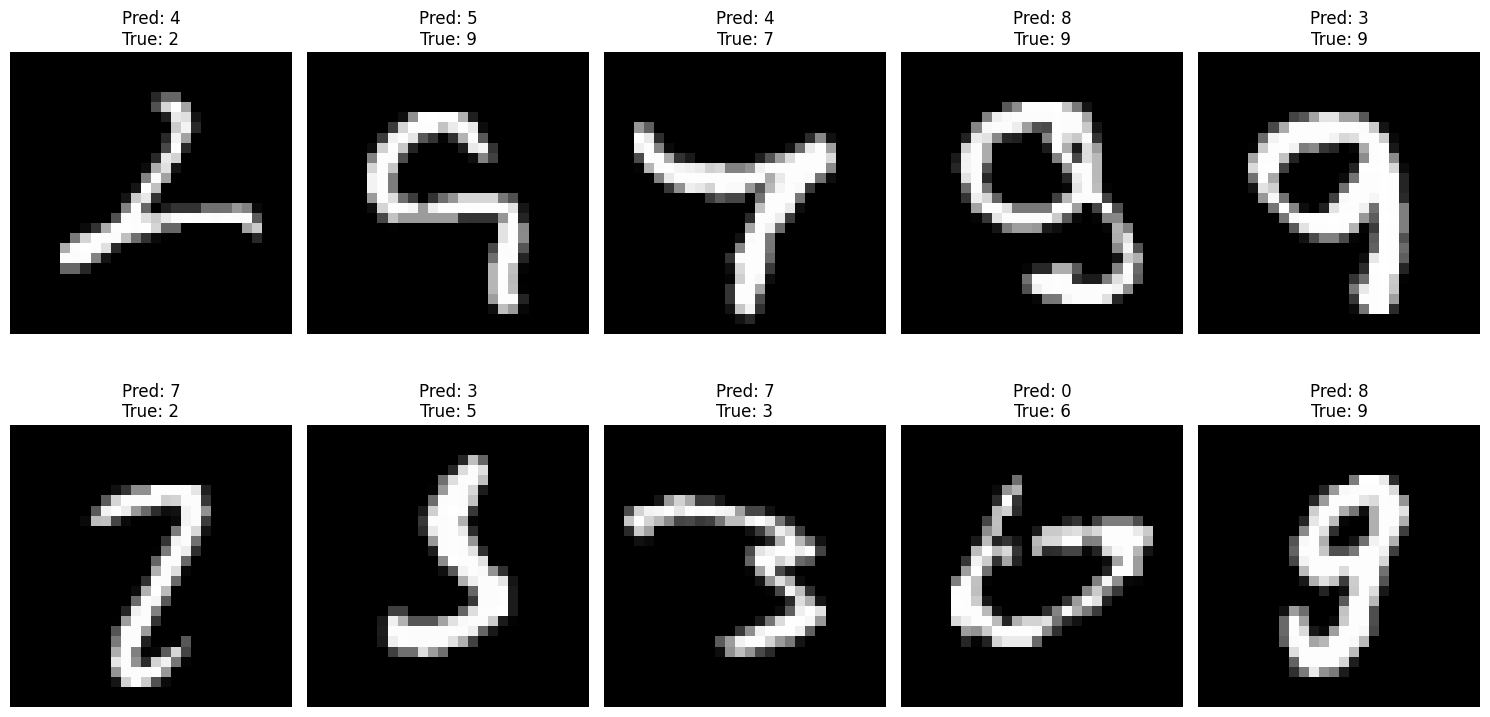

In [33]:
# Get predictions and true classes
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Identify misclassified images
misclassified_indices = np.where(y_pred_classes != y_test_classes)[0]

# Select a subset of misclassified images to visualize
num_to_show = 10  # You can adjust this number
if len(misclassified_indices) > num_to_show:
    display_indices = misclassified_indices[:num_to_show]
else:
    display_indices = misclassified_indices

# Plot the misclassified images
plt.figure(figsize=(15, 8))
for i, index in enumerate(display_indices):
    plt.subplot(2, 5, i + 1)  # Adjust subplot grid based on num_to_show
    plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {y_pred_classes[index]}\nTrue: {y_test_classes[index]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 56ms/step


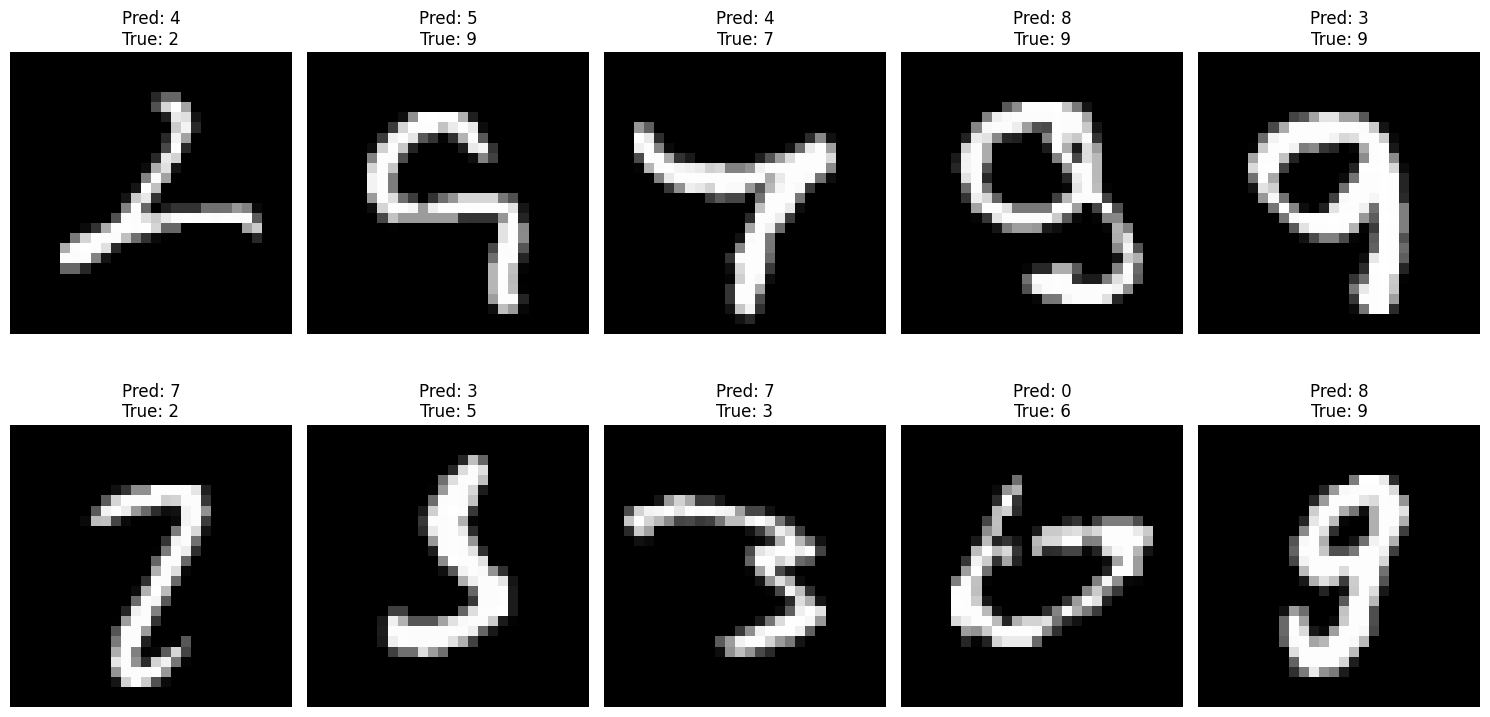

In [21]:
# Ensure X_test is in the correct flattened and normalized format
X_test_processed = X_test.reshape((X_test.shape[0], 28 * 28)).astype('float32') / 255.0

# Ensure y_test is one-hot encoded
y_test_encoded = to_categorical(y_test, 10)

# Get predictions and true classes using the processed X_test and encoded y_test
y_pred = model.predict(X_test_processed)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_encoded, axis=1)

# Identify misclassified images
misclassified_indices = np.where(y_pred_classes != y_test_classes)[0]

# Select a subset of misclassified images to visualize
num_to_show = 10  # You can adjust this number
if len(misclassified_indices) > num_to_show:
    display_indices = misclassified_indices[:num_to_show]
else:
    display_indices = misclassified_indices

# Plot the misclassified images
plt.figure(figsize=(15, 8))
for i, index in enumerate(display_indices):
    plt.subplot(2, 5, i + 1)  # Adjust subplot grid based on num_to_show
    # Use the original X_test for visualization before flattening and normalization
    plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {y_pred_classes[index]}\nTrue: {y_test_classes[index]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## Experiment with different network architectures


In [36]:
# Define a new Sequential model with a different architecture
model_new = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the new model
model_new.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the summary of the new model
print("New Model Summary:")
model_new.summary()

print('----------------- Model training -----------------')

# Train the new model
history_new = model_new.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

New Model Summary:


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

----------------- Model training -----------------
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8730 - loss: 0.4235 - val_accuracy: 0.9629 - val_loss: 0.1239
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9689 - loss: 0.1024 - val_accuracy: 0.9679 - val_loss: 0.1047
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9783 - loss: 0.0680 - val_accuracy: 0.9732 - val_loss: 0.0882
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9850 - loss: 0.0462 - val_accuracy: 0.9712 - val_loss: 0.0955
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9886 - loss: 0.0367 - val_accuracy: 0.9768 - val_loss: 0.0895
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9901 - loss: 0.0305 - val_accuracy: 0.9749 - val_loss: 0.0982
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9916 - loss: 0.0259 - val_accuracy: 0.9750 - val_loss: 0.1000
Epoch 8/10
1500/1500 ━━━━━━━━━━━━

In [31]:
df = pd.read_csv('/content/train.csv')
display(df.head())

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Thank you